In [204]:
#Bibliotecas
import pandas as pd 
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
!pip install contextily
import contextily as ctx
from shapely.wkt import loads

In [27]:
df = pd.read_csv("teste.csv")
df_metro = pd.read_csv("metro.csv")
df_wifi = pd.read_csv("wifi.csv")
df_aeroporto = pd.read_csv("aeroporto.csv")
df_banheiros_publicos = pd.read_csv("banheiros_publicos.csv")
df_bebedouros = pd.read_csv("bebedouros.csv")
df_bike = pd.read_csv("bike_shelter.csv")
df_carsboats = pd.read_csv("carboatsnomobile.csv")
df_combustivel_eletrico = pd.read_csv("eletrico.csv")
df_estacionamentos_municipais = pd.read_csv("estacionamentos municipais.csv")
df_farmacias = pd.read_csv("farmacias.csv")
df_farmers = pd.read_csv("farmers.csv")
df_fumo = pd.read_csv("fumo.csv")
df_galeria = pd.read_csv("galerias.csv")
df_jardim = pd.read_csv("jardim.csv")
df_loteria = pd.read_csv("loteria.csv")
df_museu = pd.read_csv("museu.csv")
df_piscinas = pd.read_csv("piscinas.csv")
df_pistas_gelo = pd.read_csv("pistas.csv")
df_onibus = pd.read_csv("pontosonibus.csv")
df_rotasbike = pd.read_csv("rotasbike.csv")
df_supermercados = pd.read_csv("supermercado.csv")
df_teatro = pd.read_csv("teatros.csv")
df_trem = pd.read_csv("trem.csv")
df_universidades = pd.read_csv("universidades.csv")

In [2]:
#MODELAGEM

#Predição do preço a partir das nossas variáveis

import pandas as pd 
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
!pip install contextily
import contextily as ctx
from shapely.wkt import loads
import seaborn as sns
import numpy as np

df2 = pd.read_csv("df2.csv")

In [3]:
df2.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,...,Trem,Museu,Bike,Jardim,Universidades,Estacionamentos,Bebedouros,Metro,teatro,wifi
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000,...,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169,...,0.016710,0.327095,0.035914,0.000859,0.190964,0.007506,4.227083,0.882071,0.816971,0.891827
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692,...,0.128182,0.879849,0.192561,0.029296,0.554183,0.086312,4.292831,0.949829,3.303866,1.231335
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,...,1.000000,7.000000,2.000000,1.000000,5.000000,1.000000,26.000000,8.000000,42.000000,12.000000


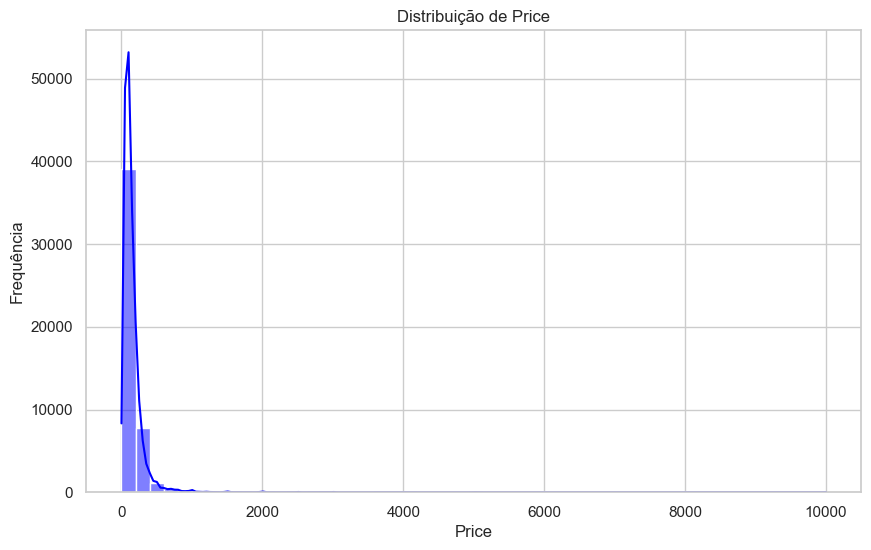

In [4]:
#Histograma do preço. Podemos verificar que a distribuição não é normal, outliers que podem impactar na previsão. 
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df2['price'], bins=50, kde=True, color='blue')
plt.title('Distribuição de Price')
plt.xlabel('Price')
plt.ylabel('Frequência')
plt.show()

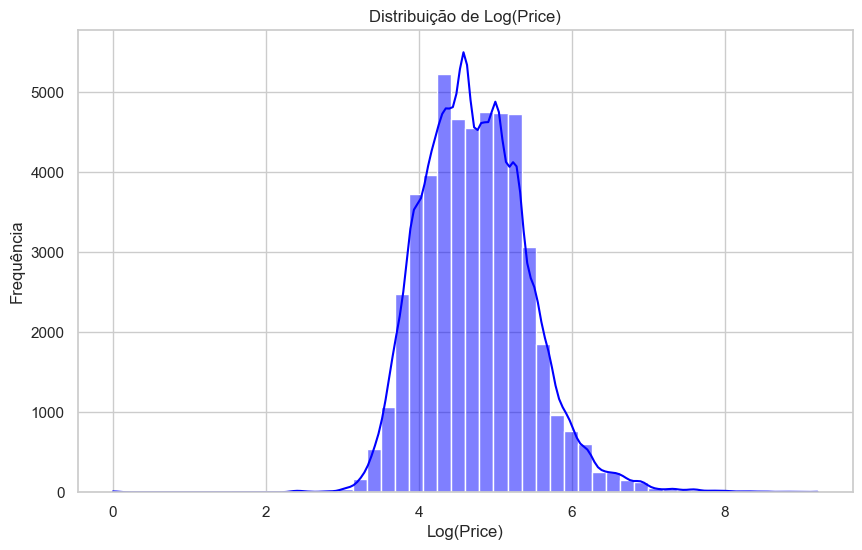

In [5]:
# Afim de achatar a distribuição, aplicamos transformação logarítmica na variável preço
df2['log_price'] = np.log1p(df2['price'])  # log1p para evitar problemas com valores zero

# Histograma do log_price mostra que a distribuição fica melhor do que antes. 
plt.figure(figsize=(10, 6))
sns.histplot(df2['log_price'], bins=50, kde=True, color='blue')
plt.title('Distribuição de Log(Price)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequência')
plt.show()

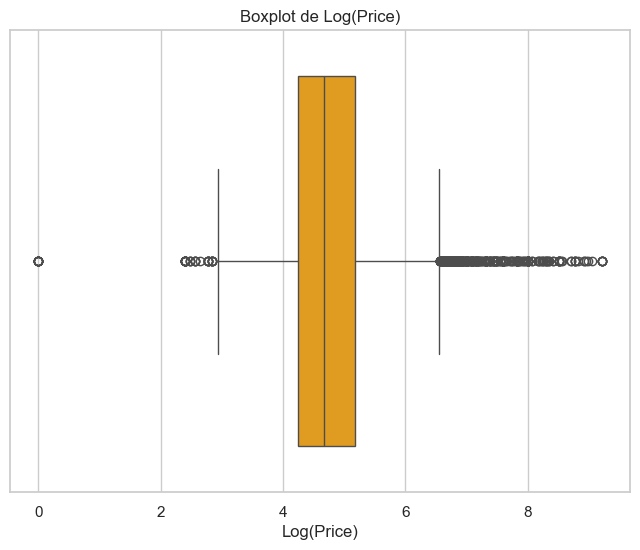

Número de outliers em Log(Price): 388
      price  log_price
495    2000   7.601402
761    1300   7.170888
945    3000   8.006701
1104   1300   7.170888
1413   1000   6.908755


In [6]:
#Verificando a distribuição para os preços no logaritmo usando boxplot, podemos verificar que ainda possuem outliers. A ideia aqui é retirar os outliers da acima/abaixo de 3 desvios (conforme a literatura sugere)
mean_log_price = df2['log_price'].mean()
std_log_price = df2['log_price'].std()

# Definir limites para outliers (3 desvios padrão)
lower_limit_log = mean_log_price - 3 * std_log_price
upper_limit_log = mean_log_price + 3 * std_log_price

# Filtrar outliers em log_price
outliers_log = df2[(df2['log_price'] < lower_limit_log) | (df2['log_price'] > upper_limit_log)]

# Boxplot de log_price com outliers destacados
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2['log_price'], color='orange')
plt.title('Boxplot de Log(Price)')
plt.xlabel('Log(Price)')
plt.show()

# Exibir outliers
print("Número de outliers em Log(Price):", outliers_log.shape[0])
print(outliers_log[['price', 'log_price']].head())

In [7]:
# Filtrar para remover outliers
df2 = df2[(df2['log_price'] >= lower_limit_log) & (df2['log_price'] <= upper_limit_log)]

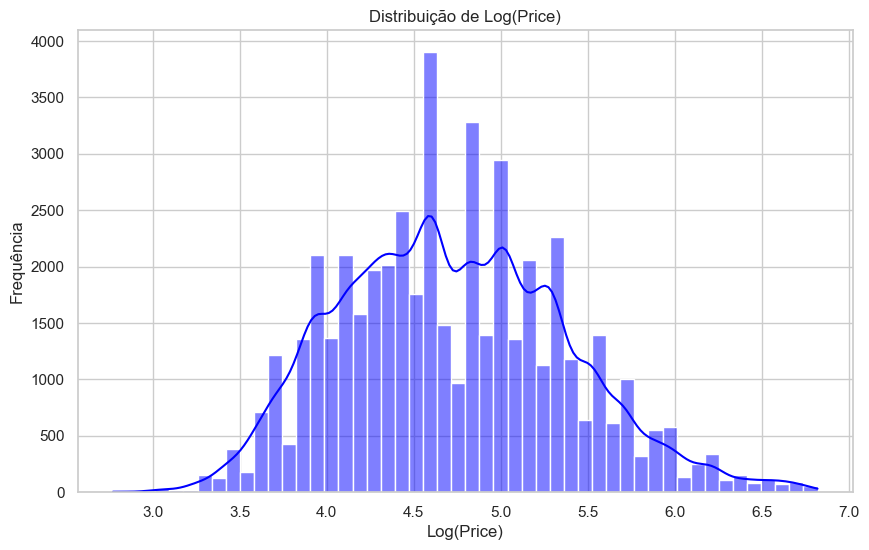

In [8]:
# Transformar em Log
df2.loc[:, 'log_price'] = np.log1p(df2['price'])

# Histograma do log_price
plt.figure(figsize=(10, 6))
sns.histplot(df2['log_price'], bins=50, kde=True, color='blue')
plt.title('Distribuição de Log(Price)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequência')
plt.show()

In [9]:
# Verificar valores faltantes
print(df2.isnull().sum())



id                                  0
nome                               16
host_id                             0
host_name                          21
bairro_group                        0
bairro                              0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimo_noites                       0
numero_de_reviews                   0
ultima_review                    9863
reviews_por_mes                  9863
calculado_host_listings_count       0
disponibilidade_365                 0
Banheiros Publicos                  0
Farmacias                           0
Farmers                             0
Loteria                             0
Onibus                              0
Galeria                             0
Trem                                0
Museu                               0
Bike                                0
Jardim                              0
Universidade

In [10]:
#Para não perdermos os valores faltantes, tiramos a média da coluna e inserimos a média dentro dos valores faltantes. 

df2.loc[:, 'reviews_por_mes'] = df2['reviews_por_mes'].fillna(df2['reviews_por_mes'].mean()) #Aplicar a média para dados faltantes em reviews por mes

In [11]:
#one-hot encoding para os dados de room type e bairro group
df2 = pd.get_dummies(df2, columns=['room_type'], prefix='room_type')
df2 = pd.get_dummies(df2, columns=['bairro_group'], prefix='bairro_group')

In [13]:
#Modelo a ser criado
X = df2[['latitude', 'longitude', "minimo_noites", "numero_de_reviews", "reviews_por_mes", "disponibilidade_365",
         "Banheiros Publicos", "Farmacias", "Farmers", "Loteria", "Onibus", "Galeria", "Museu",  "Universidades", "Estacionamentos", "Bebedouros",
                 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'bairro_group_Bronx', 'bairro_group_Brooklyn', 
                'bairro_group_Manhattan', 'bairro_group_Queens','bairro_group_Staten Island', 'wifi', 'teatro', 'Metro' ]] # Seleção explícita de colunas
y = df2["log_price"]  # Alvo

print(X.shape, y.shape)

(48506, 27) (48506,)


In [14]:
#Dividindo o modelo entre treino e teste. Utilizamos 30% para treinar e 70% para validar.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
#Obter a importancia de cada variável a partir do RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=20)
rf.fit(X_train, y_train)
sorted_idx = (-rf.feature_importances_).argsort()
list_of_tuples = list(zip(X.columns[sorted_idx], rf.feature_importances_[sorted_idx]))
feat_importance = pd.DataFrame(list_of_tuples, columns=['feature', 'feature importance'])
feat_importance


,feature,feature importance
0,room_type_Entire home/apt,0.408987
1,Galeria,0.096888
2,longitude,0.093819
3,latitude,0.083524
4,disponibilidade_365,0.062296
5,reviews_por_mes,0.043201
6,numero_de_reviews,0.042258
7,minimo_noites,0.039582
8,Bebedouros,0.024144
9,Onibus,0.024041


In [17]:
feat_importance['feature importance'].sum()

1.0000000000000002

C:\Users\mathe\AppData\Local\Temp\ipykernel_215664\1067748611.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60, fontsize=7)
C:\Users\mathe\AppData\Local\Temp\ipykernel_215664\1067748611.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60, fontsize=7)


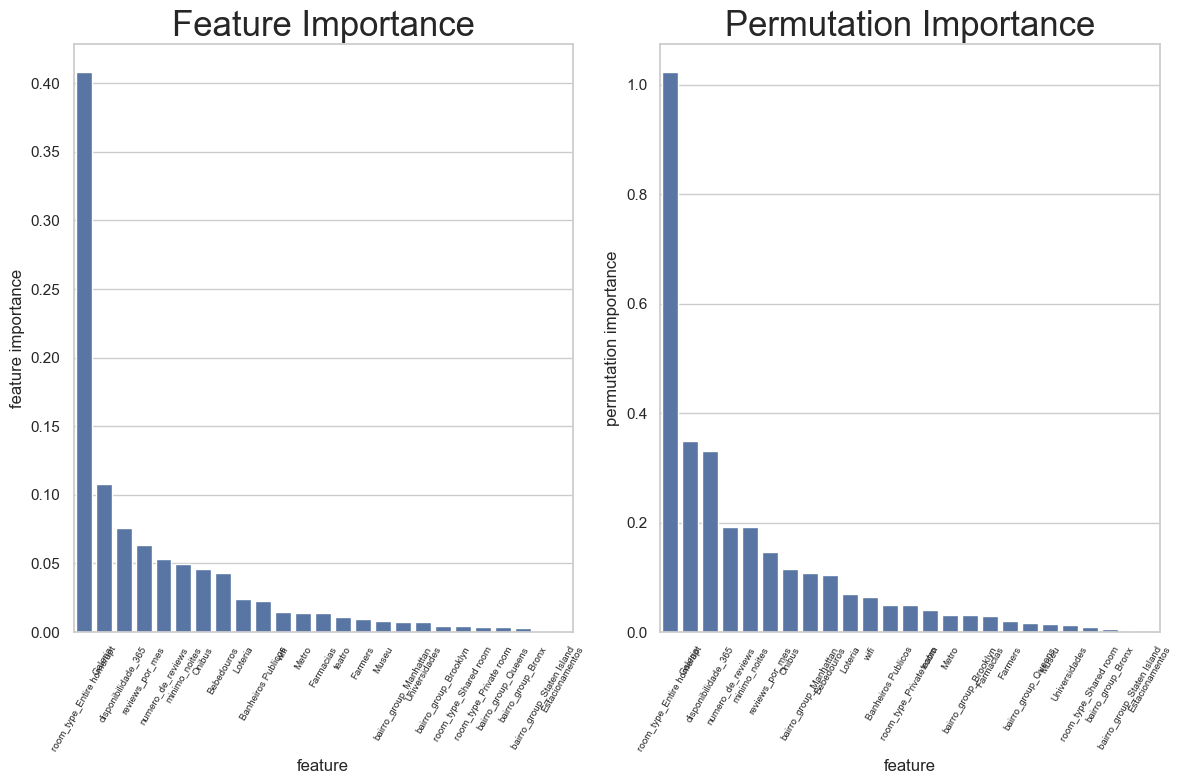

In [235]:
#Verificando a importancia das features a partir dos dois métodos. Podemos encontrar que as principais features são iguais para ambos. 
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_train, y_train)
sorted_idx = (-perm_importance.importances_mean).argsort()
list_of_tuples = list(zip(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx]))
perm_importance = pd.DataFrame(list_of_tuples, columns=['feature', 'permutation importance'])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 8))

# Importância padrão do Random Forest
ax1 = sns.barplot(data=feat_importance, x='feature', y='feature importance', ax=ax1)
ax1.set_title('Feature Importance', fontsize=25)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60, fontsize=7)

# Importância baseada em permutação
ax2 = sns.barplot(data=perm_importance, x='feature', y='permutation importance', ax=ax2)
ax2.set_title('Permutation Importance', fontsize=25)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60, fontsize=7)

plt.tight_layout()


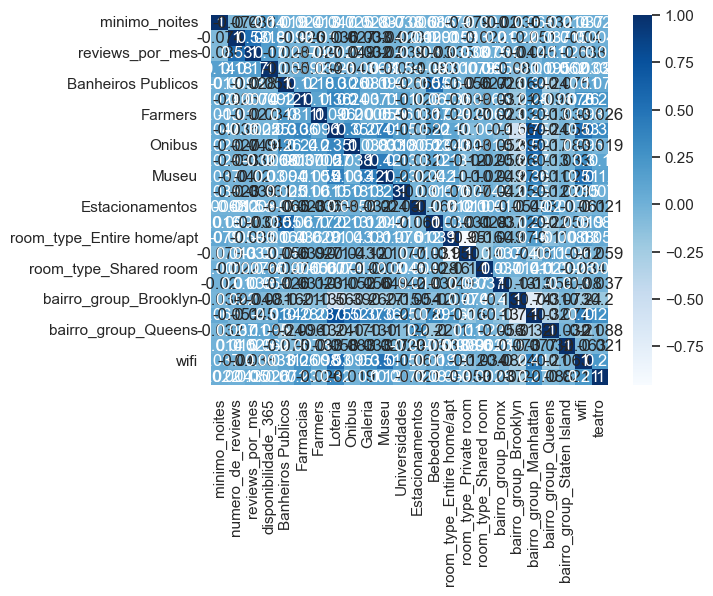

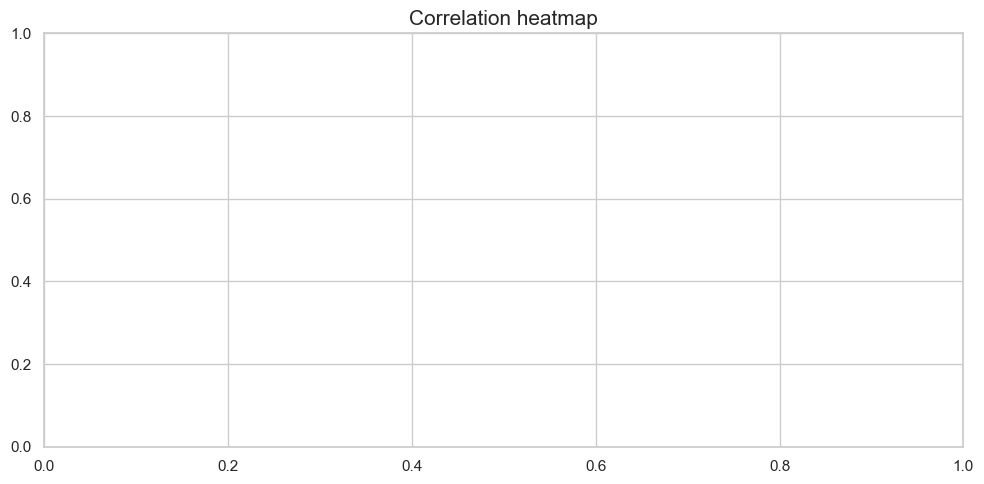

In [191]:
#O gráfico de correlação pode nos ajudar a encontrar as principais variáveis associadas com o preço (e consequentemente as que não são). Entretanto, decidi manter todas as variáveis no modelo apenas para ter um panorama geral da importância deles. 
sns.heatmap(X_train.corr(method='pearson'), annot=True, cmap='Blues')
plt.figure(figsize=(10,5))
plt.title('Correlation heatmap', fontsize=15)
plt.tight_layout()
plt.show()

In [21]:
#Treinando o modelo de predição. As métricas a serem verificadas são o R² que vai demonstrar o quanto as variáveis explicam o target e o MSE para verificar o erro médio nas previsões. 

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    results = {}

    # Treinamento
    start = time()
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time()
    results['train_time'] = end - start

    # Predição
    start = time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time()
    results['pred_time'] = end - start

    # Métricas
    results['r2_train'] = r2_score(y_train[:300], predictions_train)
    results['r2_test'] = r2_score(y_test, predictions_test)
    results['mse_train'] = mean_squared_error(y_train[:300], predictions_train)
    results['mse_test'] = mean_squared_error(y_test, predictions_test)

    return results

# Exemplo de chamada
learner = RandomForestRegressor(random_state=42)
results = train_predict(learner, sample_size=100, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
print(results)


{'train_time': 0.3018226623535156, 'pred_time': 0.2691159248352051, 'r2_train': 0.6218419357174887, 'r2_test': 0.4723281945376405, 'mse_train': 0.12987938209137076, 'mse_test': 0.22226775149913316}


In [22]:
#Aqui, vamos fazer a comparação de diferentes modelos de predição. Os modelos utilizados trabalham bem com relações não-lineares (que são o nosso caso).
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
!pip install catboost lightgbm  
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# Definindo os modelos
reg_A = RandomForestRegressor(random_state=42)
reg_B = GradientBoostingRegressor(random_state=42)
reg_C = DecisionTreeRegressor(random_state=42)
reg_D = CatBoostRegressor(random_state=42, verbose=0)
reg_E = LGBMRegressor(random_state=42)

samples_1 = int(round(len(X_train) / 100))  # 1% do conjunto de treinamento
samples_10 = int(round(len(X_train) / 10))  # 10% do conjunto de treinamento
samples_100 = len(X_train)  # 100% do conjunto de treinamento

for reg in [reg_A, reg_B, reg_C, reg_D, reg_E]:
    reg_name = reg.__class__.__name__
    results[reg_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[reg_name][i] = train_predict(reg, samples, X_train, y_train, X_test, y_test)

for i in results.items():
    print(i[0])  # Nome do modelo
    print(type(i[1]))  # Verificar o tipo de i[1]
    try:
        df = pd.DataFrame(i[1]).rename(columns={0: '1%', 1: '10%', 2: '100%'})
        display(df)
    except Exception as e:
        print(f"Erro ao criar DataFrame: {e}")


C:\Users\mathe\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\mathe\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\mathe\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mathe\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\mathe\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 561
[LightGBM] [Info] Number of data points in the train set: 340, number of used features: 23
[LightGBM] [Info] Start training from score 4.707723
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

,1%,10%,100%
train_time,0.646229,6.236308,72.880120
pred_time,0.349859,0.575778,0.881686
r2_train,0.922815,0.936862,0.941882
r2_test,0.532458,0.584749,0.629635
mse_train,0.026509,0.021685,0.019961
mse_test,0.196940,0.174914,0.156006


GradientBoostingRegressor
<class 'dict'>


,1%,10%,100%
train_time,0.296838,1.651458,14.756723
pred_time,0.060569,0.059459,0.065783
r2_train,0.860573,0.656921,0.608489
r2_test,0.526647,0.601571,0.617760
mse_train,0.047887,0.117831,0.134466
mse_test,0.199387,0.167828,0.161008


DecisionTreeRegressor
<class 'dict'>


,1%,10%,100%
train_time,0.012996,1.026669e-01,1.106184
pred_time,0.010996,1.400352e-02,0.017864
r2_train,1.000000,1.000000e+00,1.000000
r2_test,0.180839,1.636029e-01,0.257658
mse_train,0.000000,6.573841e-34,0.000000
mse_test,0.345050,3.523101e-01,0.312692


CatBoostRegressor
<class 'dict'>


,1%,10%,100%
train_time,3.372156,5.858297,14.244977
pred_time,0.034290,0.027246,0.026644
r2_train,0.983121,0.829918,0.668638
r2_test,0.535025,0.599850,0.638712
mse_train,0.005797,0.058415,0.113807
mse_test,0.195858,0.168553,0.152183


LGBMRegressor
<class 'dict'>


,1%,10%,100%
train_time,0.395821,0.964634,1.144884
pred_time,0.072160,0.076741,0.074684
r2_train,0.914794,0.800099,0.640238
r2_test,0.520937,0.593086,0.635469
mse_train,0.029264,0.068656,0.123561
mse_test,0.201792,0.171402,0.153549


In [ ]:
#O catboosterregressor tem entre todos os modelos, o melhor desempenho tanto no r² quanto no mse. Utilizaremos ele para prever os dados de preço no exercício indicado. 

In [203]:
import numpy as np
import pandas as pd

# Dados do apartamento
novo_apartamento = {
    'id': 2595,
    'nome': 'Skylit Midtown Castle',
    'host_id': 2845,
    'host_name': 'Jennifer',
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'ultima_review': '2019-05-21',
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}

# Converter o dicionário em um DataFrame
novo_apartamento_df = pd.DataFrame([novo_apartamento])

# Selecionar somente as colunas usadas no treinamento
colunas_modelo = ['room_type', 'minimo_noites',
                  'numero_de_reviews', 'reviews_por_mes', 
                  'calculado_host_listings_count', 'disponibilidade_365', 'bairro_group']

# Garantir que as colunas do novo dado correspondem às usadas no modelo
X_novo = novo_apartamento_df[colunas_modelo]

# Se houver variáveis categóricas, transformá-las (exemplo: 'room_type')
X_novo = pd.get_dummies(X_novo, columns=['room_type'], drop_first=True)
X_novo = pd.get_dummies(X_novo, columns=['bairro_group'], drop_first=True)

# Garantir que as colunas em X_novo correspondem ao X_train
X_novo = X_novo.reindex(columns=X_train.columns, fill_value=0)

# Fazer a previsão com o CatBoostRegressor treinado
log_previsao = reg_D.predict(X_novo)

# Reverter o logaritmo para obter o valor original do preço
previsao = np.exp(log_previsao)

# Exibir a previsão
print(f"Preço previsto para o apartamento: ${previsao[0]:.2f}")



Preço previsto para o apartamento: $59.42


In [24]:
import numpy as np
import pandas as pd

#O primeiro passo é verificar, através da latitude e longitude, o restante das informações referentes ao lugar. Como temos uma tabela com dados de geolocalização, vamos tentar filtrar as informações diretamente da tabela.

# Latitude e longitude de interesse
latitude_alvo = 40.75362
longitude_alvo = -73.98377

# Colunas que você deseja obter
colunas_desejadas = [
    "minimo_noites", "numero_de_reviews", "reviews_por_mes", "disponibilidade_365",
    "Banheiros Publicos", "Farmacias", "Farmers", "Loteria", "Onibus", "Galeria", "Museu", 
    "Universidades", "Estacionamentos", "Bebedouros", "wifi", "teatro", 'Metro'
]

# Filtrar a linha correspondente à latitude e longitude
linha_correspondente = df2[
    (df2['latitude'] == latitude_alvo) & (df2['longitude'] == longitude_alvo)
]

# Selecionar apenas as colunas desejadas
informacoes = linha_correspondente[colunas_desejadas]

# Exibir as informações
print(informacoes)


   minimo_noites  numero_de_reviews  reviews_por_mes  disponibilidade_365  \
0              1                 45             0.38                  355   

   Banheiros Publicos  Farmacias  Farmers  Loteria  Onibus  Galeria  Museu  \
0                   3          0        0       14       7        7      1   

   Universidades  Estacionamentos  Bebedouros  wifi  teatro  Metro  
0              1                0           0     5       3      1  


In [26]:
#Agora, vamos completar os dados para ter uma informação mais acertada do preço. 


# Dados do apartamento
predicao = {
    'id': 2595,
    'nome': 'Skylit Midtown Castle',
    'host_id': 2845,
    'host_name': 'Jennifer',
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'ultima_review': '2019-05-21',
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355,
    'Loteria': 14,
    'Onibus': 7,
    'Galeria': 2,
    'Museu': 1, 
    'Universidades': 1,
    'wifi':5,
    'teatro':3,
    'Metro': 1
    
}


predicao_df = pd.DataFrame([predicao])
colunas = ['room_type', 'minimo_noites', 'latitude', 'longitude','numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365', 'bairro_group', 'Loteria', 'Onibus', 'Galeria', 'Museu', 'Universidades',
                 'wifi', 'teatro',]
X_novo = predicao_df[colunas]
X_novo = pd.get_dummies(X_novo, columns=['room_type'], drop_first=True)
X_novo = pd.get_dummies(X_novo, columns=['bairro_group'], drop_first=True)
X_novo = X_novo.reindex(columns=X_train.columns, fill_value=0)
log_previsao = reg_D.predict(X_novo)
previsao = np.exp(log_previsao) # Reverter o logaritmo para obter o valor original do preço
print(f"Preço previsto para o apartamento: ${previsao[0]:.2f}")



Preço previsto para o apartamento: $122.58


In [ ]:
#3. Explique como você faria a previsão do preço a partir dos dados. Quais  variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de 
#problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê? 

#Pensando em uma ideia de de impacto, as variáveis do modelo são muito pobres em determinar o preço. Nesse sentido, fui a procura de variáveis que pudessem enriquecer o modelo. Encontramos dados de contagem (500metros dos pontos) para diversos dados de infraestrutura e bens de consumo. 
#Eles foram utilizados no modelo. Um one hot encoding foi utilizado para variáveis categoricas para utilizarmos no modelo. Embora houvessem variáveis que para mim, não fazem sentido estar no modelo, eles entregam algum tipo de ganho e nesse sentido, tudo o que tivemos em mãos no dataset foi utilizado.
#Utilizamos modelos de regressão por estamos tentanto prever o preço. Transformamos a variável preço em log para tentar normalizar os dados. Além disso, excluimos valores acima de 3 desvios, pois além de serem poucos (menos de 1% do frame), eles poderiam interferir no preço. 
#O modelo final foi o CatboostRegressor pois foi o que melhor entregou o R² (63%) e MSE (15%), embora o desempenho computacional não seja o melhor entre todos. A razão do uso dele foi principalmente a ideia que ele é um bom modelo para dados não lineares. 

#4. Supondo um apartamento com as seguintes características, Qual seria a sua sugestão de preço?
#O preço previsto é de R$122,58. Como o valor real é $225, nosso modelo consegue explicar algo em torno de 55% do valor (Existe esse apartamento no dataset). 

In [34]:
import joblib

# Salvar o modelo
joblib.dump(reg_D, 'modelo_catboost.pkl')

['modelo_catboost.pkl']

In [35]:
pip install nbconvert

In [36]:
!pip freeze > requirements.txt
